In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sns
sns.set()
from scipy.stats import pearsonr
import re
import string


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [31]:
data = pd.read_csv('/Users/sazid/Downloads/user_courses_review_09_2023.csv', on_bad_lines='skip')
with pd.option_context('display.max_rows', None):
    display(data)

course_name  \
0                                  A/B Testing in Python   
1                                  A/B Testing in Python   
2                                  A/B Testing in Python   
3                                  A/B Testing in Python   
4                                  A/B Testing in Python   
5                                  A/B Testing in Python   
6                                  A/B Testing in Python   
7                                  A/B Testing in Python   
8                                  A/B Testing in Python   
9                                  A/B Testing in Python   
10                                 A/B Testing in Python   
11                                 A/B Testing in Python   
12                                 A/B Testing in Python   
13                                 A/B Testing in Python   
14                                 A/B Testing in Python   
15                                 A/B Testing in Python   
16                                 A/B Testing in Python   
17                                 A/B Testing in Python   
18                                 A/B Testing in Python   
19                                 A/B Testing in Python   
20                                 A/B Testing in Python   
21                                 A/B Testing in Python   
22                                 A/B Testing in Python   
23                                 A/B Testing in Python   
24                                 A/B Testing in Python   
25                                 A/B Testing in Python   
26                                 A/B Testing in Python   
27                                 A/B Testing in Python   
28                                 A/B Testing in Python   
29                                 A/B Testing in Python   
30                                 A/B Testing in Python   
31                                 A/B Testing in Python   
32                                 A/B Testing in Python   
33                                 A/B Testing in Python   
34                                 A/B Testing in Python   
35                                 A/B Testing in Python   
36                                 A/B Testing in Python   
37                                 A/B Testing in Python   
38                                 A/B Testing in Python   
39                                 A/B Testing in Python   
40                                 A/B Testing in Python   
41                                 A/B Testing in Python   
42                                 A/B Testing in Python   
43                                 A/B Testing in Python   
44                                 A/B Testing in Python   
45                                 A/B Testing in Python   
46                                 A/B Testing in Python   
47                                 A/B Testing in Python   
48                                 A/B Testing in Python   
49                                 A/B Testing in Python   
50                                 A/B Testing in Python   
51                                 A/B Testing in Python   
52                                 A/B Testing in Python   
53                                 A/B Testing in Python   
54                                 A/B Testing in Python   
55                                 A/B Testing in Python   
56                                 A/B Testing in Python   
57                                 A/B Testing in Python   
58                                 A/B Testing in Python   
59                                 A/B Testing in Python   
60                                 A/B Testing in Python   
61                                 A/B Testing in Python   
62                                 A/B Testing in Python   
63           Accounting and Financial Statement Analysis   
64           Accounting and Financial Statement Analysis   
65           Accounting and Financial Statement Analysis   
66           Accounting a

In [50]:
data.isnull().sum()

course_name       0
lecture_name      0
review_rating     0
review_comment    0
dtype: int64

In [49]:
data = data.dropna()
data.describe(include='all')

course_name  \
count                                   10637   
unique                                    101   
top     Introduction to Data and Data Science   
freq                                     1708   
mean                                      NaN   
std                                       NaN   
min                                       NaN   
25%                                       NaN   
50%                                       NaN   
75%                                       NaN   
max                                       NaN   

                                     lecture_name  review_rating  \
count                                       10637   10637.000000   
unique                                        226            NaN   
top     Why do we Need each of these Disciplines?            NaN   
freq                                         1300            NaN   
mean                                          NaN       4.843189   
std                                           NaN       0.523106   
min                                           NaN       1.000000   
25%                                           NaN       5.000000   
50%                                           NaN       5.000000   
75%                                           NaN       5.000000   
max                                           NaN       5.000000   

       review_comment  
count           10637  
unique           7189  
top         Excellent  
freq              385  
mean              NaN  
std               NaN  
min               NaN  
25%               NaN  
50%               NaN  
75%               NaN  
max               NaN

In [47]:
data['review_rating']= pd.to_numeric(data['review_rating'],errors='coerce')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10637 entries, 0 to 10841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   course_name     10637 non-null  object 
 1   lecture_name    10637 non-null  object 
 2   review_rating   10637 non-null  float64
 3   review_comment  10637 non-null  object 
dtypes: float64(1), object(3)
memory usage: 415.5+ KB


In [54]:
ln=data['review_comment'].str.len()

In [56]:
corr, p = pearsonr(ln, data['review_rating'])
corr

-0.28929882317409295

In [170]:
words = ['love','great','good','excellent']
z1 = {word: data['review_comment'].str.contains(fr"{word}", case=False, na=False).sum() for word in words}

In [171]:
sum(z1.values())

5417

In [172]:
words2 = ['bad','terrible','poor','worst']
z2 = {word2 : data['review_comment'].str.contains(fr"{word2}", case = False, na=False).sum() for word2 in words2}
sum(z2.values())

30

In [185]:
words3 = ["?",'!']
z3 = {word3 : data['review_comment'].str.contains(re.escape(fr"{word3}"), case = False, na = False).sum() for word3 in words3}
z3

{'?': 31, '!': 1180}

In [209]:

z4 = data['review_comment'].str.contains(r"\b[A-Z]{2,}\b", na=False).sum()

In [210]:
z4

535

Preprocessing :

In [211]:
data['review_comment']=data['review_comment'].str.lower()

In [215]:
data['review_comment']= data['review_comment'].str.replace(f"[{string.punctuation}]", " ", regex=True)

In [266]:
data=data.reset_index(drop=True)
data

course_name  \
0                  A/B Testing in Python   
1                  A/B Testing in Python   
2                  A/B Testing in Python   
3                  A/B Testing in Python   
4                  A/B Testing in Python   
...                                  ...   
10632  Working with Text Files in Python   
10633  Working with Text Files in Python   
10634  Working with Text Files in Python   
10635  Working with Text Files in Python   
10636  Working with Text Files in Python   

                                  lecture_name  review_rating  \
0                   How to set up the A/B test            5.0   
1                   How to set up the A/B test            5.0   
2                   How to set up the A/B test            5.0   
3                   How to set up the A/B test            5.0   
4                                   Conclusion            5.0   
...                                        ...            ...   
10632     Working with Text Files - Conclusion            5.0   
10633  Principles of Importing Data in Python             5.0   
10634  Principles of Importing Data in Python             5.0   
10635  Principles of Importing Data in Python             5.0   
10636  Principles of Importing Data in Python             3.0   

                                          review_comment  pred  
0      if she could provide more details about the pr...   4.0  
1                                                   nice   5.0  
2                                       excellent course   5.0  
3                                                   nice   5.0  
4                it was an experiential learning process   5.0  
...                                                  ...   ...  
10632  this course was very informative and had a lot...   5.0  
10633                                   on to the point    5.0  
10634                                          loving it   5.0  
10635                                        good course   5.0  
10636  this is too fast   if it is expected that the ...   4.0  

[10637 rows x 5 columns]

In [218]:
vectorize = CountVectorizer()

In [219]:
x = vectorize.fit_transform(data['review_comment'])

<10637x4866 sparse matrix of type '<class 'numpy.int64'>'
	with 71263 stored elements in Compressed Sparse Row format>

In [223]:
model = MultinomialNB()
model.fit(x,data['review_rating'])

MultinomialNB()

In [261]:
y_pred=model.predict(x)

data['pred']=y_pred

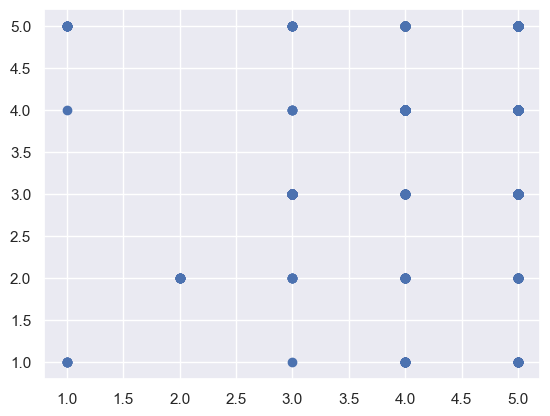

In [226]:
mat.scatter(y_pred, data['review_rating'])

In [230]:
cm = confusion_matrix(y_pred, data['review_rating'])

In [231]:
cm

array([[   5,    0,    0,    1,   11],
       [   0,    9,    0,    0,    0],
       [   1,    5,  103,    4,    9],
       [  21,   29,   30,  251,   74],
       [  20,   32,  112,  509, 9411]])

In [276]:
test = ['too much bla bla bla']
test = vectorize.transform(test)

In [277]:
res = model.predict(test)
res

array([1.])

In [275]:
data.iloc[1972]['review_comment']

'too much bla bla bla'

In [272]:
data[data['review_rating']==1]

course_name  \
348                             Advanced Microsoft Excel   
349                             Advanced Microsoft Excel   
403                 AI Applications for Business Success   
737                         Customer Analytics in Python   
1211               Data Analysis with Excel Pivot Tables   
1331         Data Cleaning and Preprocessing with pandas   
1332         Data Cleaning and Preprocessing with pandas   
1971                                       Data Strategy   
1972                                       Data Strategy   
1973                                       Data Strategy   
2002                         Data-Driven Business Growth   
2003                         Data-Driven Business Growth   
2099                     Deep Learning with TensorFlow 2   
2100                     Deep Learning with TensorFlow 2   
2563                                      Git and GitHub   
2564                                      Git and GitHub   
2565                                      Git and GitHub   
2566                                      Git and GitHub   
2567                                      Git and GitHub   
2568                                      Git and GitHub   
2647   \nHow to Think Like a Data Scientist to Become...   
3407                  Intro to ChatGPT and Generative AI   
3408                  Intro to ChatGPT and Generative AI   
3409                  Intro to ChatGPT and Generative AI   
5214               Introduction to Data and Data Science   
5215               Introduction to Data and Data Science   
5216               Introduction to Data and Data Science   
6345                               Introduction to Excel   
6346                               Introduction to Excel   
7305                             Introduction to Tableau   
7306                             Introduction to Tableau   
7403                Linear Algebra and Feature Selection   
7594                          Machine Learning in Python   
7923                                    Math for Finance   
8409                                            Power BI   
8410                                            Power BI   
8578                                         Probability   
8689                                  Python for Finance   
9043                          Python Programmer Bootcamp   
9044                          Python Programmer Bootcamp   
9411                                                 SQL   
10132                                         Statistics   
10133                                         Statistics   
10134                                         Statistics   
10281                The Machine Learning Algorithms A-Z   
10282                The Machine Learning Algorithms A-Z   
10620                           Who Does What in Finance   

                                            lecture_name  review_rating  \
348              F1 to F12 - Using Excel's Function Keys            1.0   
349              F1 to F12 - Using Excel's Function Keys            1.0   
403                            Quantile Difference Tests            1.0   
737                      Standardizing Segmentation Data            1.0   
1211   This is how the report can be used in practice...            1.0   
1331          A Few Comments on Using .loc[] and .iloc[]            1.0   
1332          A Few Comments on Using .loc[] and .iloc[]            1.0   
1971           Curating the most important data insights            1.0   
1972           Curating the most important data insights            1.0   
1973                                 Using data for good            1.0   
2002                               Data Maturity Level 3            1.0   
2003                  What to do to improve even further            1.0   
2099                                   Non-NN approaches            1.0   
2100                        N-parameter gradient descent            1.0   
2563                                   